# EDA

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import numpy as np

In [125]:
#______________________________Covid_CT________________________________
covid_meta_full=pd.read_excel("Covid-CT-Metainfo.xlsx")
#Done somthing with age column for EDA purposes
age=covid_meta["Age"].dropna()
age=[x if x!="40+" else 40 for x in age]
age=[x if x!="Young Child" else 10 for x in age]
#because of course there are useless spaces
covid_meta["Gender"]=covid_meta["Gender"].replace("M ","M")
covid_meta["Gender"]=covid_meta["Gender"].replace("F ","F")
gender=[not a for a in covid_meta["Age"].isna()]
gender=covid_meta["Gender"][gender]
#______________________________VinDr_CXR________________________________
labels_vindr=pd.read_csv("image_labels_test.csv")
annotations_vindr=pd.read_csv("annotations_test.csv")


## Data balance

VinDr_CXR dataset doesn't have any metadata other than disease and its location

### Balance of classes in training/test sets

None of our datsets had predefined training and test sets.

### Distribution of patients age

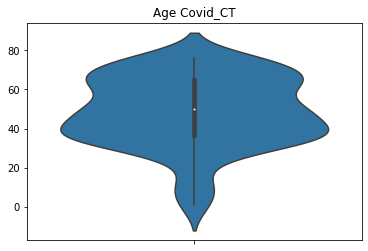

In [128]:
ages=[age]
dataset_names=["Covid_CT"]
def plot_age(age,dataset_name):
    sns.violinplot(y=age)
    plt.title(f"Age {dataset_name}")
    plt.show()
#Plotting code
for age,dataset_name in zip(ages,dataset_names):
    plot_age(age,dataset_name)


### Gender balance

<ipython-input-129-feafde06e1b9>:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  plot_data=np.transpose(itemfreq(gender))


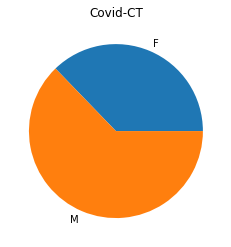

In [129]:

gender2=covid_meta["Gender"].dropna()

def gender_balance(gender,dataset_name):
    plot_data=np.transpose(itemfreq(gender))
    plt.pie(plot_data[1],labels=plot_data[0])
    plt.title(dataset_name)
    plt.show()
gender_balance(gender2,"Covid-CT")

### Distribution of age and gender

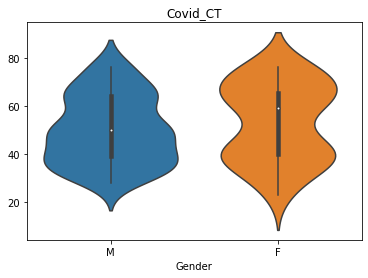

In [131]:

sns.violinplot(x=gender, y=age)
plt.title("Covid_CT")
plt.show()

### Distribution of age and healthiness 

Covid-CT database doesn't hold age data for healthy patients

### Other data balance

Covid- CT database doesn't hold any other categorical data meaningful for machine learning process

## Metadata analysis

### Metadata list

Covid- CT:
* Patient ID
* Gender
* Age
* Location
* Medical history
* Time
* Severity
* DOI
* Other diseases(Unfortunately most of that data are NaNs and the rest doesn't bring a lot of information)

VinDr_CXR:
* Disease(s)
* symptoms location

### Are there children

In [117]:

database_names=["Covid-Ct","VinDr_CXR"]
ages=[age,[]]

def count_children(age,database_name):
    children=[]
    for a in age:
        if(a<18):
            children.append(a)
    if(len(age)>0):
        plot_age(children)
        print(f'In {database_name} database there are {len(children)} children, which is {np.round(10000*len(children)/len(age))/100}% of the database.')
    else:
        print(f'In {database_name} database there is unknown number of children.')
    
for age, database_name in zip(ages,database_names):
    children=count_children(age,database_name)



In Covid-Ct database there is unknown number of children.
In VinDr_CXR database there is unknown number of children.


### What data is stored in DICOM?

None of our datasets contained images in DICOM form

### Missing metadata

In [122]:
print("_______________________________________VinDr-CXR_______________________________")
print(labels_vindr.info())
print(annotations_vindr.info())
print("_______________________________________Covid-CT_______________________________")
print(covid_meta.info())

_______________________________________VinDr-CXR_______________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   image_id            3000 non-null   object
 1   Aortic enlargement  3000 non-null   int64 
 2   Atelectasis         3000 non-null   int64 
 3   Calcification       3000 non-null   int64 
 4   Cardiomegaly        3000 non-null   int64 
 5   Clavicle fracture   3000 non-null   int64 
 6   Consolidation       3000 non-null   int64 
 7   Edema               3000 non-null   int64 
 8   Emphysema           3000 non-null   int64 
 9   Enlarged PA         3000 non-null   int64 
 10  ILD                 3000 non-null   int64 
 11  Infiltration        3000 non-null   int64 
 12  Lung Opacity        3000 non-null   int64 
 13  Lung cavity         3000 non-null   int64 
 14  Lung cyst           3000 non-null   int6

### Redundant data
#### (redundant spaces, insignificant columns, etc.)

In Covid- CT dataset there were quite a few problems:
* some records in gender column had redundant spaces
* in age column some values were heavily generalised ex. "40+"
* unnecessary columns(or with too little non null values): "Location","Other diseases","DOI","Captions","Severity","Medical history"

In VinDr-CXR dataset no redundant data was detected.

### Severity of changes

In Covid- CT dataset severity of changes was described in differing levels of detail(for some patients they weren't described).
In VinDr-CXR dataset severity of changes wasn't described.

### Are there covid patients

Covid-CT <- I have no idea

VinDr-CXT<- No, dataset is older tha this disease

### What data was deleted

In Covid- CT dataset patient privacy is preserved by removing all patient-specific information from image headers.

In VinnDr-CXR dataset patient privacy is preserved by removing all patient-specific information from image headers.